In [42]:
import pandas as pd

In [1]:
from ipywidgets import interact

In [9]:
interact(lambda x : x**2, x=3);

interactive(children=(IntSlider(value=3, description='x', max=9, min=-3), Output()), _dom_classes=('widget-int…

In [10]:
import folium

In [201]:
import json

In [203]:
with open('./departements.geojson', 'r') as f:
    j = f.read()

In [205]:
js = json.loads(j)

In [313]:
js['features'][0]['properties']['code']

'02'

In [211]:
js.keys()

dict_keys(['type', 'features'])

In [283]:
set(map_data.No.values);

In [279]:
all([type(x) == str for x in map_data.No.values])

True

In [177]:
superficie_dep.dtypes

Département / No / Région    object
Superficie [en km²]          object
Population                    int64
Densite [hab. /km²]          object
departement                  object
No                           object
region                       object
dtype: object

In [182]:
superficie_dep['Population'] = superficie_dep['Population'].astype('int')

In [183]:
# superficie_dep[['No','Population']] = superficie_dep[['No','Population']].astype(float)

In [219]:
superficie_dep.No;

In [317]:
map_data = superficie_dep[['No','Population']][superficie_dep.No.str.len() == 2]

In [331]:
del m

In [306]:
map_data = map_data.reset_index()

In [316]:
map_data;

In [332]:
m = folium.Map(location=[48, 2], zoom_start= 5,width=500,height=500)

In [336]:
m.choropleth(geo_data="./departements.geojson", data= map_data, columns=['No','Population'],key_on= 'feature.properties.code', fill_color='RdGn',
        fill_opacity=0.7, 
        line_opacity=0.2)

ValueError: RdGn is not a valid ColorBrewer code

In [334]:
display(m)

In [337]:
js

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[3.172704445659, 50.011996744997],
      [3.1821975358417, 50.012335988197],
      [3.2174797791605, 50.023182479597],
      [3.230541907493, 50.031311385584],
      [3.2579143291896, 50.024436966985],
      [3.2581174425539, 50.031770179151],
      [3.2707157754254, 50.029466123914],
      [3.2801699122715, 50.015181662188],
      [3.2870975810209, 50.014184796787],
      [3.3105782894546, 50.019566104726],
      [3.3293480229819, 50.015985397797],
      [3.3371076812771, 50.017403207904],
      [3.3529876206925, 50.035860226771],
      [3.3748529135519, 50.03640787562],
      [3.3915828503565, 50.031901508452],
      [3.39890478116, 50.034755671377],
      [3.4135732928197, 50.027585361882],
      [3.447055807483, 50.022439728958],
      [3.491357082465, 50.018859654652],
      [3.5071388293519, 50.035778426858],
      [3.5286124821151, 50.038180178229],
      [3.53

In [53]:
data = pd.read_excel('./Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2016.xls', sheet_name=3, na_values='nc')

-> add 'nc' to nan values in read_csv

pd.to_numeric

choisir une clé slugify

pandas str pad

regex sub

In [54]:
data.keys()

Index(['Généralistes et compétences MEP', 'DEPARTEMENT', 'EFFECTIFS',
       'HONORAIRES SANS DEPASSEMENT (Euros)', 'DEPASSEMENTS (Euros)',
       'FRAIS DE DEPLACEMENT (Euros)', 'TOTAL DES HONORAIRES (Euros)'],
      dtype='object')

In [44]:
df = list(data.values())[3]

In [45]:
df.columns

Index(['Généralistes et compétences MEP', 'DEPARTEMENT', 'EFFECTIFS',
       'HONORAIRES SANS DEPASSEMENT (Euros)', 'DEPASSEMENTS (Euros)',
       'FRAIS DE DEPLACEMENT (Euros)', 'TOTAL DES HONORAIRES (Euros)'],
      dtype='object')

In [56]:
data.dtypes

Généralistes et compétences MEP         object
DEPARTEMENT                             object
EFFECTIFS                                int64
HONORAIRES SANS DEPASSEMENT (Euros)    float64
DEPASSEMENTS (Euros)                   float64
FRAIS DE DEPLACEMENT (Euros)           float64
TOTAL DES HONORAIRES (Euros)           float64
dtype: object

In [67]:
data.head()

,Généralistes et compétences MEP,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
0,01- Médecine générale,01- Ain,386,57501330.60,607026.80,239292.36,58347649.76
1,01- Médecine générale,02- Aisne,351,66500602.32,304206.04,379373.44,67184181.80
2,01- Médecine générale,03- Allier,243,36627729.07,59008.16,355037.95,37041775.18
3,01- Médecine générale,04- Alpes-Hte-Provence,159,23162208.55,96266.01,356512.32,23614986.88
4,01- Médecine générale,05- Hautes-Alpes,157,20029279.46,237177.08,161293.51,20427750.05


In [46]:
df.dtypes

Généralistes et compétences MEP        object
DEPARTEMENT                            object
EFFECTIFS                               int64
HONORAIRES SANS DEPASSEMENT (Euros)    object
DEPASSEMENTS (Euros)                   object
FRAIS DE DEPLACEMENT (Euros)           object
TOTAL DES HONORAIRES (Euros)           object
dtype: object

In [7]:
df['depassement'] = df.loc[df['DEPASSEMENTS (Euros)']!='nc']['DEPASSEMENTS (Euros)'].astype('float')

In [8]:
df['depassement_moyen'] = df.depassement / df.EFFECTIFS

In [9]:
df_depassement_moy = df[df.EFFECTIFS>0].groupby('DEPARTEMENT').mean().copy()

In [10]:
df_depassement_moy['No'] = df_depassement_moy.index.str.extract('([^-]+)').values

In [157]:
superficie_dep = pd.read_html('http://france.ousuisje.com/departements/classement/superficie.php')[0]

In [159]:
superficie_dep['Population'] = superficie_dep['Population'].str.replace('\xa0','').astype('int')

In [162]:
superficie_dep[['departement','No','region']] = superficie_dep['Département / No / Région'].str.extract(r'([^\(]+)(\(\d+\w*\))(.+)')

In [163]:
superficie_dep['No'] = superficie_dep['No'].str.replace(r'[\(\)]','')

In [15]:
merge = pd.merge(df_depassement_moy,superficie_dep,on='No', how='inner')

In [16]:
merge['superficie'] = merge['Superficie [en km²]'].str.replace('\xa0','').astype('int')

In [17]:
merge['densite_medecin_dpt'] = merge.EFFECTIFS / merge.superficie

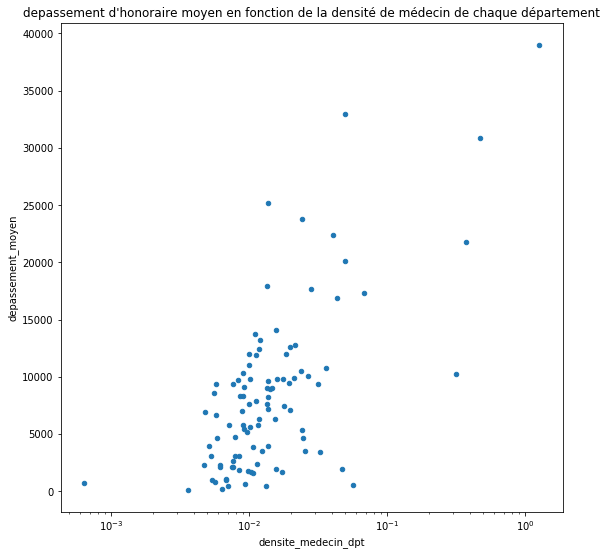

In [19]:
merge.plot(x = 'densite_medecin_dpt', y = 'depassement_moyen', kind = 'scatter', logx=True, figsize=(9,9),title = "depassement d'honoraire moyen en fonction de la densité de médecin de chaque département")

In [222]:
import matplotlib.pyplot as plt

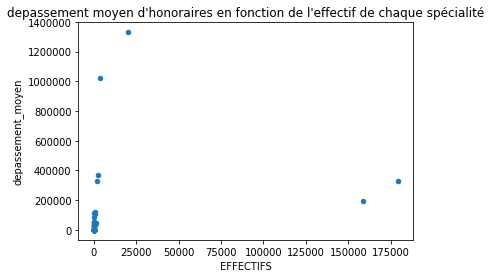

In [20]:
df.groupby('Généralistes et compétences MEP').sum().plot(x=0, y=2, kind="scatter", title= "depassement moyen d'honoraires en fonction de l'effectif de chaque spécialité")

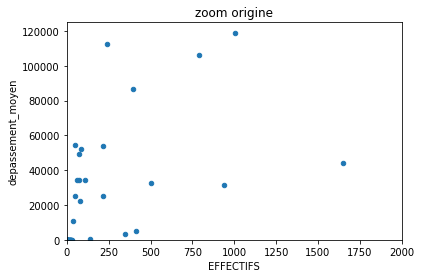

In [22]:
df.groupby('Généralistes et compétences MEP').sum().plot(x=0, y=2, kind="scatter", xlim= (0,2000), ylim = (0,125000), title = "zoom origine")